# RSV experiment with aggregated data

## Fetch the data

Get necessary files

In [1]:
import glob

In [2]:
# Get only the files from the data dir
file_paths = glob.glob("./data/*.pack.table")

In [3]:
import os

def extract_filename(fp):
    """
    Takes a filepath and gives you only the filename without the extension
    """
    base=os.path.basename(fp)
    return base.split(".")[0]

In [4]:
file_stubs = [extract_filename(name) for name in file_paths]

Read it into a pandas dataframe

In [5]:
import pandas as pd

In [6]:
def read_coverage_table(fp):
    """
    Call pandas.read_csv on a file
    """
    return pd.read_csv(fp,  sep='\t', lineterminator='\n')

In [7]:
cov_tables = [read_coverage_table(f) for f in file_paths]
cov_tables

[        seq.pos  node.id  node.offset  coverage
 0             0        1            0        15
 1             1        1            1        15
 2             2        1            2        15
 3             3        1            3        14
 4             4        1            4        15
 ...         ...      ...          ...       ...
 196484   196484      748           67         0
 196485   196485      748           68         0
 196486   196486      748           69         0
 196487   196487      748           70         0
 196488   196488      748           71         0
 
 [196489 rows x 4 columns],
         seq.pos  node.id  node.offset  coverage
 0             0        1            0        20
 1             1        1            1        20
 2             2        1            2        21
 3             3        1            3        21
 4             4        1            4        21
 ...         ...      ...          ...       ...
 196484   196484      748           67 

## Isolate the *node id* and *coverge* columns for each sample

In [22]:
cov_tables_node_id_and_coverage = [cov_table[["node.id", "coverage"]] for cov_table in cov_tables]
cov_tables_node_id_and_coverage

[        node.id  coverage
 0             1        15
 1             1        15
 2             1        15
 3             1        14
 4             1        15
 ...         ...       ...
 196484      748         0
 196485      748         0
 196486      748         0
 196487      748         0
 196488      748         0
 
 [196489 rows x 2 columns],
         node.id  coverage
 0             1        20
 1             1        20
 2             1        21
 3             1        21
 4             1        21
 ...         ...       ...
 196484      748       114
 196485      748       114
 196486      748       114
 196487      748       114
 196488      748       114
 
 [196489 rows x 2 columns],
         node.id  coverage
 0             1       213
 1             1       222
 2             1       261
 3             1       263
 4             1       262
 ...         ...       ...
 196484      748         0
 196485      748         0
 196486      748         0
 196487      748      

## Aggregate the covergae table by node id

In [42]:
grouped_cov_tables = [cov_table.groupby(["node.id"]).median() for cov_table in cov_tables_node_id_and_coverage]
grouped_cov_tables

[         coverage
 node.id          
 1             3.0
 2            47.0
 3           129.0
 4             0.0
 5            36.0
 ...           ...
 744           0.0
 745         332.0
 746       21820.0
 747          97.0
 748           0.0
 
 [748 rows x 1 columns],
          coverage
 node.id          
 1             0.0
 2             0.0
 3             0.0
 4             0.0
 5           305.0
 ...           ...
 744           0.0
 745          24.0
 746        5698.5
 747         170.0
 748         116.0
 
 [748 rows x 1 columns],
          coverage
 node.id          
 1             0.0
 2             4.0
 3             0.0
 4             1.0
 5           506.0
 ...           ...
 744           0.0
 745         236.0
 746        8937.0
 747         145.0
 748           0.0
 
 [748 rows x 1 columns],
          coverage
 node.id          
 1             0.0
 2             0.0
 3             0.0
 4             0.0
 5            22.0
 ...           ...
 744           0.0
 745   

In [250]:
coverage_vectors = pd.DataFrame([grouped_cov_tables[i]["coverage"] for i in range(len(file_paths))], 
                                index=file_stubs)
display(coverage_vectors)

node.id,1,2,3,4,5,6,7,8,9,10,...,739,740,741,742,743,744,745,746,747,748
H_504_02_04,3.0,47.0,129.0,0.0,36.0,49.0,4506.0,3528.0,0.0,154.0,...,160.0,262.5,2381.0,662.0,2016.0,0.0,332.0,21820.0,97.0,0.0
H_504_26_03,0.0,0.0,0.0,0.0,305.0,0.0,1025.0,2262.0,87.0,0.0,...,46.0,29.0,18.0,0.0,17122.0,0.0,24.0,5698.5,170.0,116.0
H_506_23_04,0.0,4.0,0.0,1.0,506.0,1.0,1883.0,7976.0,0.0,1.0,...,0.0,157.5,1269.0,671.0,364.0,0.0,236.0,8937.0,145.0,0.0
H_506_09_04,0.0,0.0,0.0,0.0,22.0,11.0,185.0,2610.5,0.0,0.0,...,1128.0,146.5,286.0,119.0,2697.0,0.0,82.0,807.5,6.0,0.0
H_518_19_03,2.0,0.0,0.0,0.0,1821.5,59.0,6005.0,2848.0,2.0,10.0,...,17.0,229.5,1073.0,220.0,1426.0,1.0,164.0,2902.0,587.0,0.0
H_525_02_04,1.0,4111.0,0.0,0.0,0.0,1.0,2575.0,939.0,0.0,0.0,...,0.0,291.0,1465.0,394.0,4820.0,0.0,204.0,29676.0,7.0,0.0
H_506_30_04,3.0,0.0,237.0,0.0,63.0,1.0,5171.0,4713.0,4.0,0.0,...,0.0,36.0,1126.0,545.0,45904.0,0.0,225.0,6194.5,83.0,1315.5
H_535_05_04,1.0,0.0,0.0,2.0,0.0,1.0,3.0,1.0,0.0,367.0,...,0.0,132.0,1601.0,434.0,1983.0,0.0,55.0,5283.5,422.0,0.0
H_513_13_04,111.0,2.0,0.0,23.0,1.0,1.0,2.0,2374.0,1.0,1.0,...,0.5,413.0,1891.0,951.0,7512.0,0.0,618.0,60650.0,27.0,0.0
H_513_30_03,0.0,2.0,0.0,11.0,1163.0,1678.5,3822.0,10140.0,275.5,0.0,...,0.5,145.0,280.0,45.0,10346.0,0.0,113.0,14469.5,61.0,0.0


## Visualize the data

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

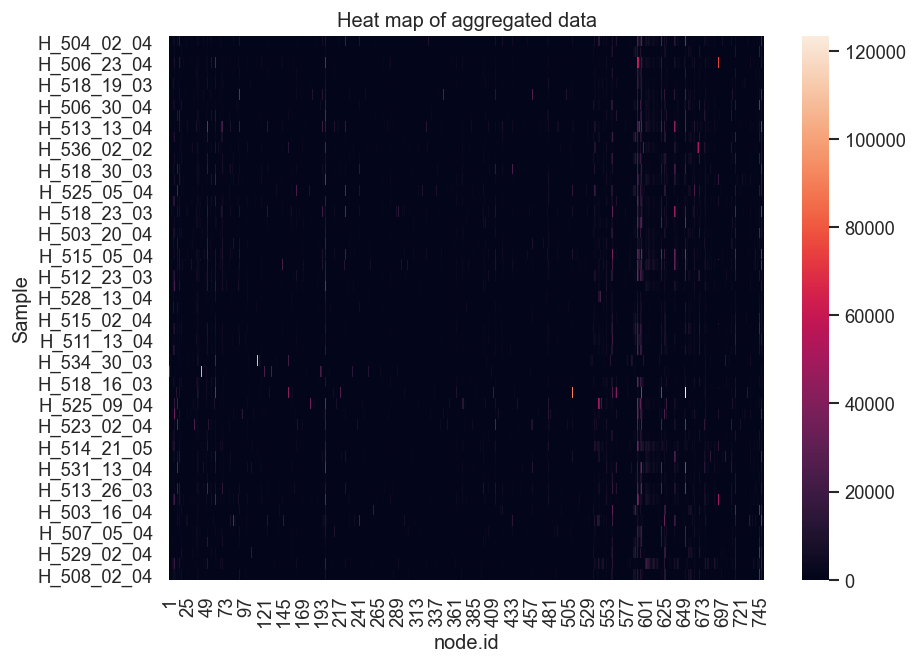

In [202]:

plt.figure(num=None, figsize=(8, 6), dpi=120)

ax = sns.heatmap(coverage_vectors)
plt.title('Heat map of aggregated data')
plt.ylabel('Sample')
plt.show()

## Normalize the data

Utility functions

In [235]:
def binarize(x):
    if x == 0:
        return 0;
    else:
        return 1

def normalize_sum_one(x):
    pass
    
from math import log

def log_transform(x):
    if x == 0:
        return 0;
    else:
        return log(x, 10)

In [267]:
grouped_cov_tables[0]

,coverage
node.id,
1,3.0
2,47.0
3,129.0
4,0.0
5,36.0
...,...
744,0.0
745,332.0
746,21820.0


In [260]:
y = pd.DataFrame([grouped_cov_tables[i]["coverage"].apply(lambda x: (x - grouped_cov_tables[i]["coverage"].min())/(grouped_cov_tables[i]["coverage"].max() - grouped_cov_tables[i]["coverage"].min()) ) for i in range(len(file_paths))],
                index=file_stubs)
y

node.id,1,2,3,4,5,6,7,8,9,10,...,739,740,741,742,743,744,745,746,747,748
H_504_02_04,0.000060,0.000934,0.002563,0.000000,0.000715,0.000973,0.089518,0.070089,0.000000,0.003059,...,0.003179,0.005215,0.047302,0.013152,0.040051,0.000000,0.006596,0.433487,0.001927,0.000000
H_504_26_03,0.000000,0.000000,0.000000,0.000000,0.014661,0.000000,0.049272,0.108734,0.004182,0.000000,...,0.002211,0.001394,0.000865,0.000000,0.823054,0.000000,0.001154,0.273927,0.008172,0.005576
H_506_23_04,0.000000,0.000053,0.000000,0.000013,0.006766,0.000013,0.025178,0.106650,0.000000,0.000013,...,0.000000,0.002106,0.016968,0.008972,0.004867,0.000000,0.003156,0.119499,0.001939,0.000000
H_506_09_04,0.000000,0.000000,0.000000,0.000000,0.001180,0.000590,0.009924,0.140033,0.000000,0.000000,...,0.060509,0.007859,0.015342,0.006383,0.144673,0.000000,0.004399,0.043316,0.000322,0.000000
H_518_19_03,0.000109,0.000000,0.000000,0.000000,0.099356,0.003218,0.327551,0.155348,0.000109,0.000545,...,0.000927,0.012518,0.058528,0.012000,0.077783,0.000055,0.008946,0.158294,0.032019,0.000000
H_525_02_04,0.000025,0.103714,0.000000,0.000000,0.000000,0.000025,0.064963,0.023689,0.000000,0.000000,...,0.000000,0.007341,0.036959,0.009940,0.121600,0.000000,0.005147,0.748676,0.000177,0.000000
H_506_30_04,0.000057,0.000000,0.004540,0.000000,0.001207,0.000019,0.099058,0.090284,0.000077,0.000000,...,0.000000,0.000690,0.021570,0.010440,0.879353,0.000000,0.004310,0.118664,0.001590,0.025200
H_535_05_04,0.000031,0.000000,0.000000,0.000061,0.000000,0.000031,0.000092,0.000031,0.000000,0.011244,...,0.000000,0.004044,0.049049,0.013296,0.060753,0.000000,0.001685,0.161869,0.012929,0.000000
H_513_13_04,0.001830,0.000033,0.000000,0.000379,0.000016,0.000016,0.000033,0.039143,0.000016,0.000016,...,0.000008,0.006810,0.031179,0.015680,0.123858,0.000000,0.010190,1.000000,0.000445,0.000000
H_513_30_03,0.000000,0.000088,0.000000,0.000486,0.051387,0.074165,0.168876,0.448038,0.012173,0.000000,...,0.000022,0.006407,0.012372,0.001988,0.457140,0.000000,0.004993,0.639338,0.002695,0.000000


In [265]:
display(y.iloc[1])

node.id
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.014661
         ...   
744    0.000000
745    0.001154
746    0.273927
747    0.008172
748    0.005576
Name: H_504_26_03, Length: 748, dtype: float64

### Binary normalization

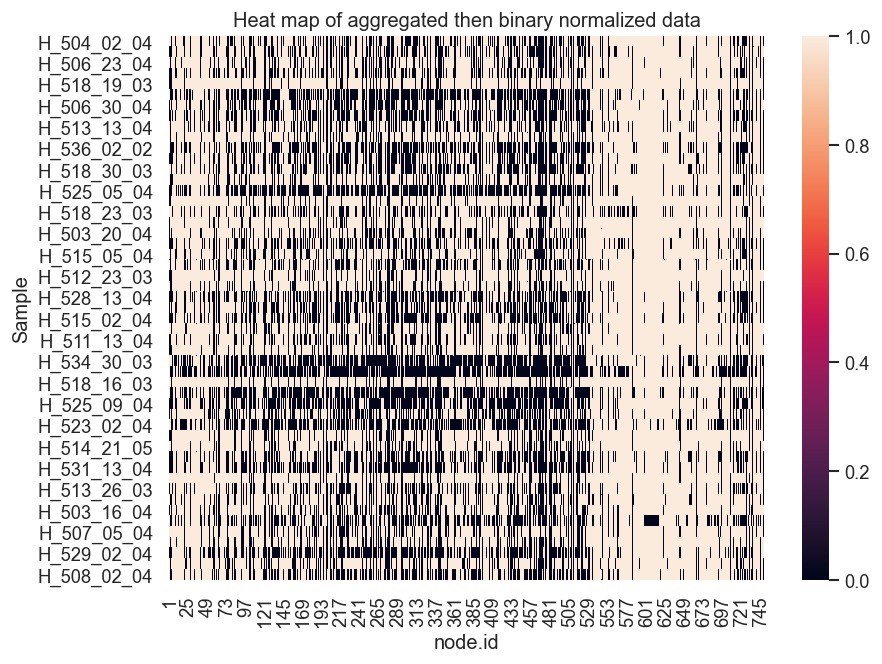

In [197]:
coverage_vectors = pd.DataFrame([grouped_cov_tables[i]["coverage"].map(binarize) for i in range(len(file_paths))], 
                                index=file_stubs)
coverage_vectors

plt.figure(num=None, figsize=(8, 6), dpi=120)

ax = sns.heatmap(coverage_vectors)

plt.title('Heat map of aggregated then binary normalized data')
plt.ylabel('Sample')
plt.show()

### As a proportion of the total

In [71]:
df = grouped_cov_tables[0]
df.max()

coverage    50336.0
dtype: float64

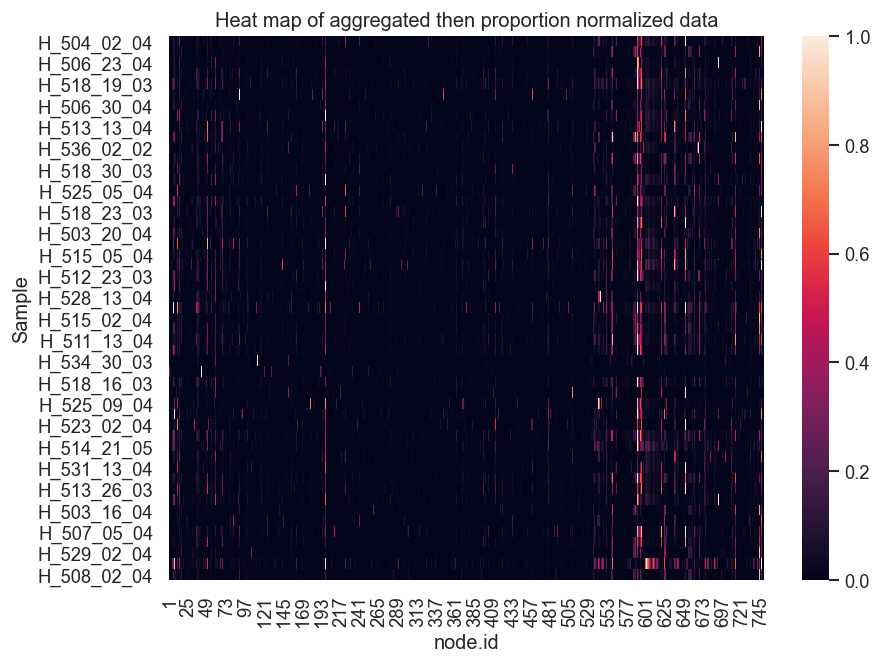

In [249]:
coverage_vectors = pd.DataFrame([grouped_cov_tables[i]["coverage"].apply(lambda x: x/grouped_cov_tables[i]["coverage"].max()) for i in range(len(file_paths))], index=file_stubs)

coverage_vectors

plt.figure(num=None, figsize=(8, 6), dpi=120)

ax = sns.heatmap(coverage_vectors)
plt.title('Heat map of aggregated then proportion normalized data')
plt.ylabel('Sample')
plt.show()

## Log transform the data

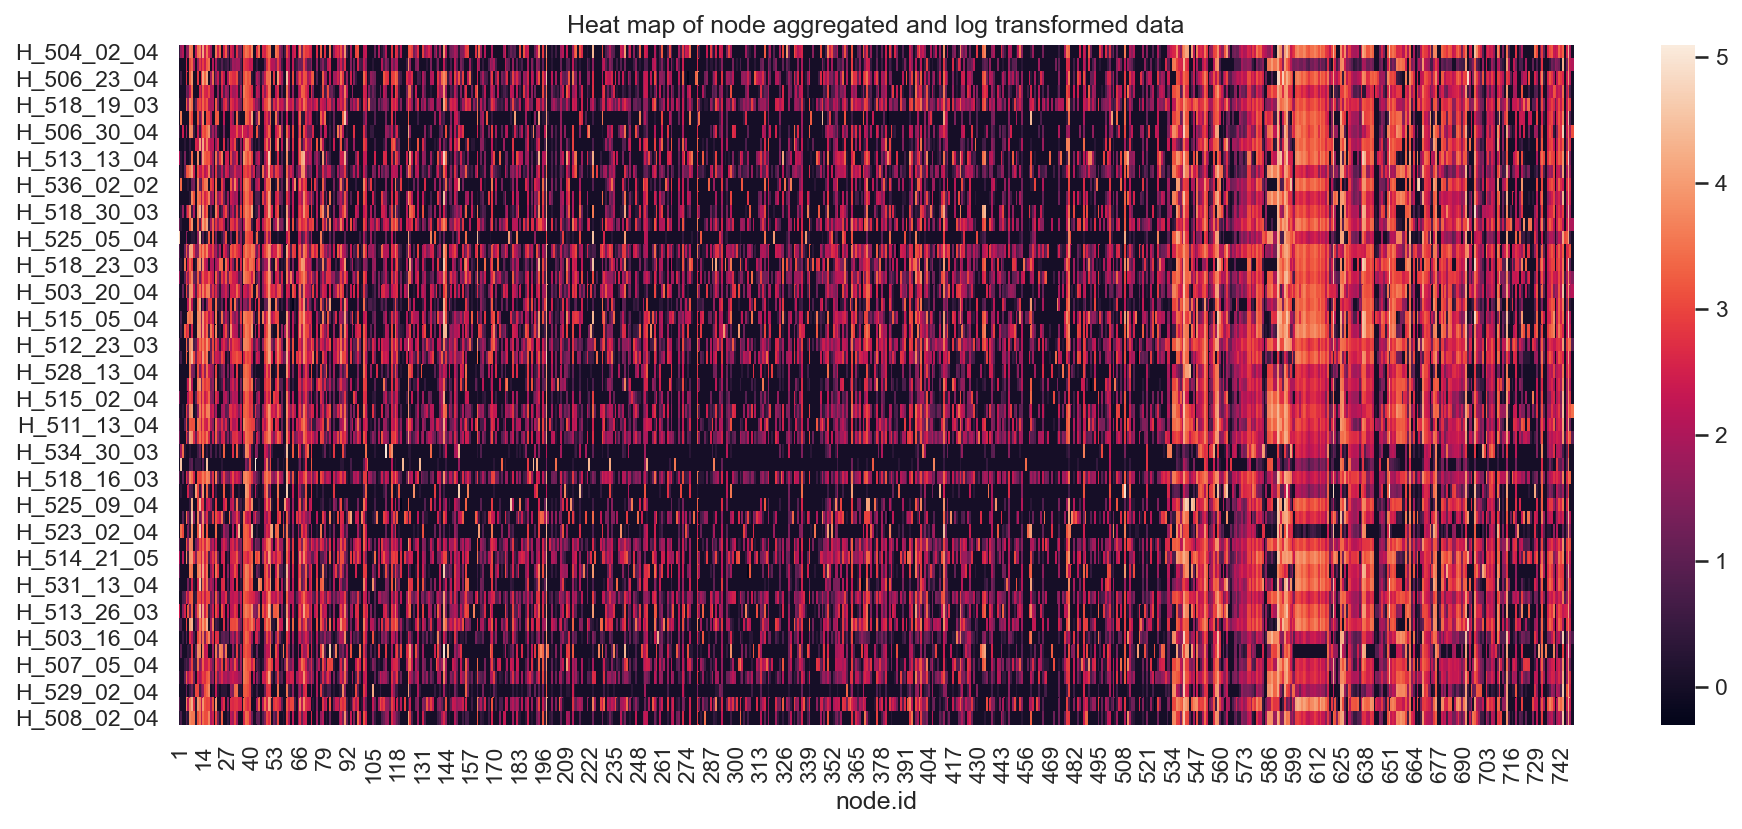

In [243]:
coverage_vectors = pd.DataFrame([grouped_cov_tables[i]["coverage"].map(log_transform) for i in range(len(file_paths))], 
                                index=file_stubs)

coverage_vectors

plt.figure(num=None, figsize=(15, 6), dpi=150)

sns.heatmap(coverage_vectors)

plt.title('Heat map of node aggregated and log transformed data')
plt.xticks(rotation=90)
plt.show()

<Figure size 3000x900 with 0 Axes>

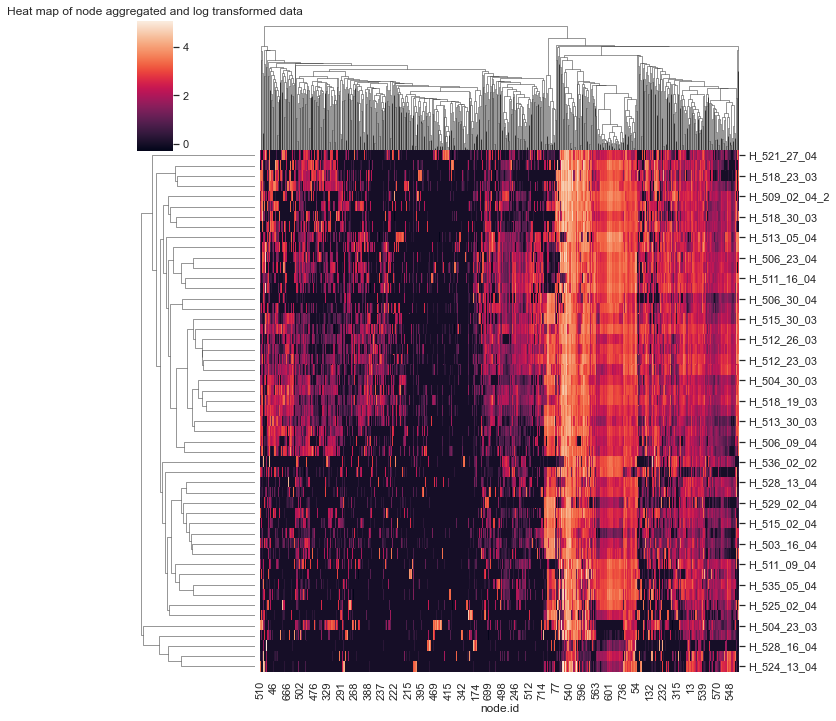

In [246]:
coverage_vectors = pd.DataFrame([grouped_cov_tables[i]["coverage"].map(log_transform) for i in range(len(file_paths))], 
                                index=file_stubs)

coverage_vectors

plt.figure(num=None, figsize=(20, 6), dpi=150)

sns.clustermap(coverage_vectors)

plt.title('Heat map of node aggregated and log transformed data')
plt.xticks(rotation=90)
plt.show()

# PCA

Scale

In [228]:
from sklearn.preprocessing import StandardScaler
comb_scaled = StandardScaler().fit_transform(coverage_vectors)

Perform PCA

In [229]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(comb_scaled)
type(principalComponents)
# display(principalComponents)

numpy.ndarray

In [230]:
pca_df = pd.DataFrame(principalComponents, 
                      columns = ['Principal Component 1', 'Principal Component 2'], 
                      index=file_stubs)

# display(pca_df)

Visualize PCA results in a scatter plot

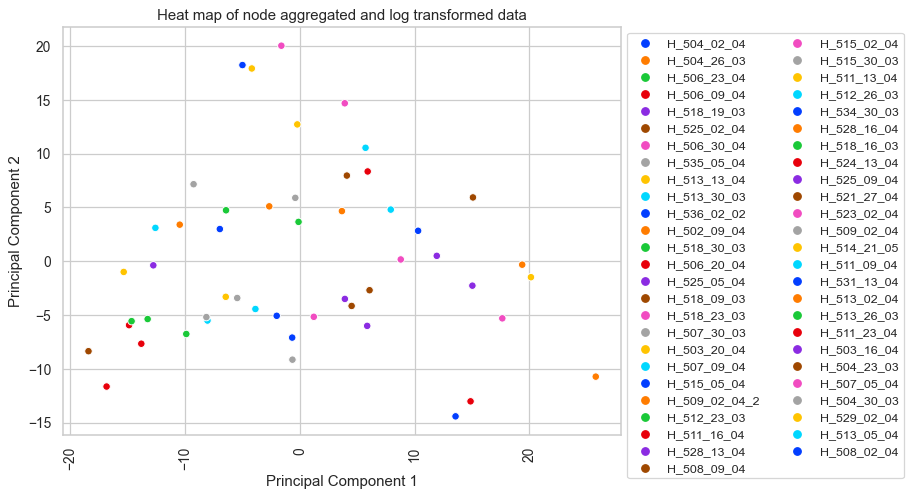

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(num=None, figsize=(8, 6), dpi=90, facecolor='w', edgecolor='k')

sns.scatterplot(data=pca_df,
                x="Principal Component 1", 
                y="Principal Component 2", 
                hue=file_stubs,
                palette=sns.color_palette("bright", 51))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.legend(ncol=2, 
           loc='center left', bbox_to_anchor=(1, 0.44),
           # to display on the bottom
           # loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, 
           # fancybox=True, 
           fontsize="small")

plt.title('Heat map of node aggregated and log transformed data')
plt.xticks(rotation=90)
plt.show()

# Distance matrix

PCA for the distance matrix. The distance matrix takes only one column so we perform PCA with only one column.

In [189]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(comb_scaled)
# display(principalComponents)
pcaDataFrame = pd.DataFrame(principalComponents, columns = ["principal component 1"], index=file_stubs)
# display(pcaDataFrame)

In [190]:
from scipy.spatial import distance_matrix
df = pcaDataFrame
distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
#display(distance_matrix)

# Neighbour joining

In [191]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
from matplotlib.pyplot import figure

In [192]:
# Condense the distance matrix
condensed = pdist(distance_matrix)

In [193]:
Z = linkage(condensed)

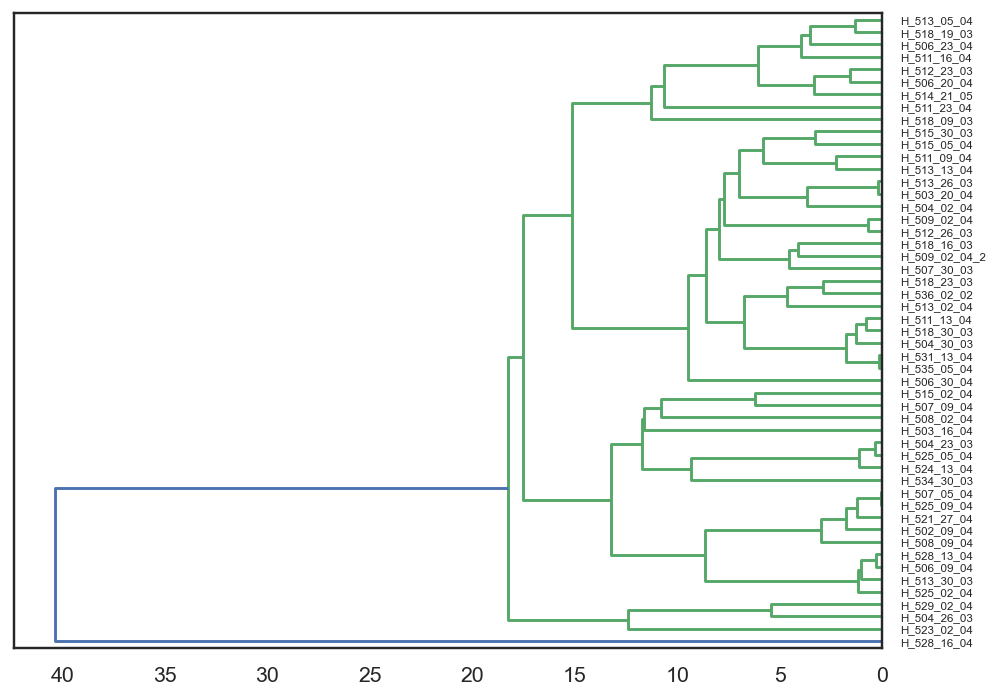

In [194]:
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=140)
sns.set(style="white")

dendrogram(Z, labels=file_stubs,  orientation='left')
plt.show()